<a href="https://colab.research.google.com/github/Carter-and/Business-Analysis-Notebooks/blob/master/W_Carter_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here I am using code learned at CU Boulder Leeds School of Business and I am looking at stock prices (via yfinance package) with time series analysis

In [0]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd
import numpy as np
import yfinance as yf
data = yf.download("GOOGL", start="2009-01-01", end="2019-06-27")

[*********************100%***********************]  1 of 1 downloaded


## Let's look at Google (GOOGL)

In [0]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,154.45,161.07,152.90,160.82,160.82,7213700
2009-01-05,160.66,165.79,157.66,164.19,164.19,9768200
2009-01-06,166.66,170.57,163.36,167.20,167.20,12837500
2009-01-07,164.32,165.62,159.53,161.17,161.17,8980000
2009-01-08,159.30,162.76,158.83,162.76,162.76,7194100


In [0]:
stock = data.Close

The following command will plot the stock price. 

Populating the interactive namespace from numpy and matplotlib


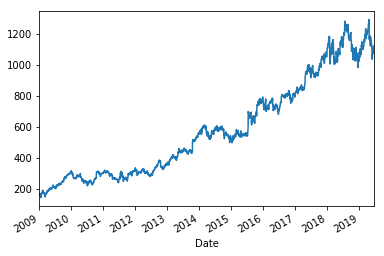

In [0]:
%pylab inline
stock.plot()

In [0]:
stock.head()
stock.tail()

Date
2009-01-02    160.82
2009-01-05    164.19
2009-01-06    167.20
2009-01-07    161.17
2009-01-08    162.76
Name: Close, dtype: float64

Date
2019-06-21    1125.37
2019-06-24    1116.70
2019-06-25    1087.58
2019-06-26    1080.32
2019-06-27    1076.63
Name: Close, dtype: float64

In [0]:
stock.values

array([ 160.82,  164.19,  167.2 , ..., 1087.58, 1080.32, 1076.63])

###  Using Numpy to look at a Time Index

In [0]:
stock.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19',
               '2019-06-20', '2019-06-21', '2019-06-24', '2019-06-25',
               '2019-06-26', '2019-06-27'],
              dtype='datetime64[ns]', name='Date', length=2639, freq=None)

In [0]:
stock.index[0]

Timestamp('2009-01-02 00:00:00')

<i>pd.to_datetime()</i> easily converts any single datetime to _Timestamp_, or a list of datetimes to _DatetimeIndex_

In [0]:
pd.to_datetime('2019/7/20 12:12:11')
pd.to_datetime('2019-7-21 3:50pm')

Timestamp('2019-07-20 12:12:11')

Timestamp('2019-07-21 15:50:00')

In [0]:
pd.to_datetime(['Jul/22/2019 22:00:08','2019-July-23 6am','24/7/2019'])

DatetimeIndex(['2019-07-22 22:00:08', '2019-07-23 06:00:00',
               '2019-07-24 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Let's now create DatetimeIndex manually:

In [0]:
pd.DatetimeIndex(['2019-7-21','22/7/2019'])

DatetimeIndex(['2019-07-21', '2019-07-22'], dtype='datetime64[ns]', freq=None)

Or, generate a range of dates using <i>pd.data_range()</i>

In [0]:
pd.date_range('07/22/2019', periods=10, freq='D')#freq='7D', freq='W'

DatetimeIndex(['2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', freq='D')

In [0]:
pd.date_range(start='07/22/2019', end='12/31/2019', freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

By default, datetime64 trackes time down to nanoseconds, i.e., dtype='datetime64[ns]'. If needed, we may ask _numpy_ to bring things down to "days" only, i.e., dtype='datetime64[D]'

In [0]:
stock.index.values.astype('datetime64[D]')

array(['2009-01-02', '2009-01-05', '2009-01-06', ..., '2019-06-25',
       '2019-06-26', '2019-06-27'], dtype='datetime64[D]')

In [0]:
date=numpy.datetime64('2019-07-08')
print(date)

2019-07-08


Differences between two _datetime64_ data are of _timedelta64_ type.

In [0]:
date1=stock.index.values[5]
date2=stock.index.values[0]
diff=date1-date2
print('date1=\t%r\ndate2=\t%r\ndiff=\t%r'%(date1,date2,diff))

date1=	numpy.datetime64('2009-01-09T00:00:00.000000000')
date2=	numpy.datetime64('2009-01-02T00:00:00.000000000')
diff=	numpy.timedelta64(604800000000000,'ns')


## Looking further into a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [0]:
stock.head(10)

Date
2009-01-02    160.82
2009-01-05    164.19
2009-01-06    167.20
2009-01-07    161.17
2009-01-08    162.76
2009-01-09    157.69
2009-01-12    156.50
2009-01-13    157.32
2009-01-14    150.64
2009-01-15    149.64
Name: Close, dtype: float64

Let's take a look at the last 10 days of data

In [0]:
stock.tail(10)

Date
2019-06-14    1086.30
2019-06-17    1093.89
2019-06-18    1105.24
2019-06-19    1104.51
2019-06-20    1113.20
2019-06-21    1125.37
2019-06-24    1116.70
2019-06-25    1087.58
2019-06-26    1080.32
2019-06-27    1076.63
Name: Close, dtype: float64

We can use acutal date to survey the stock price.

In [0]:
stock['2019-06-20']

1113.2

Or, a slice of date range even if the beginning/ending date is not part of the index.

In [0]:
stock['2019-06-1':'2019-06-22']

Date
2019-06-03    1038.74
2019-06-04    1054.49
2019-06-05    1044.64
2019-06-06    1047.76
2019-06-07    1068.37
2019-06-10    1082.76
2019-06-11    1081.04
2019-06-12    1079.10
2019-06-13    1091.01
2019-06-14    1086.30
2019-06-17    1093.89
2019-06-18    1105.24
2019-06-19    1104.51
2019-06-20    1113.20
2019-06-21    1125.37
Name: Close, dtype: float64

__rolling(n)__ does a moving average for the stock price every "n" consecutive periods. By default, 
* label is set at the end of the window
* each day is given the same weight.

In [0]:
stock.rolling(3)

Rolling [window=3,center=False,axis=0]

In [0]:
stock.rolling(3).mean()

Date
2009-01-02            NaN
2009-01-05            NaN
2009-01-06     164.070000
2009-01-07     164.186667
2009-01-08     163.710000
2009-01-09     160.540000
2009-01-12     158.983333
2009-01-13     157.170000
2009-01-14     154.820000
2009-01-15     152.533333
2009-01-16     150.086667
2009-01-20     147.046667
2009-01-21     147.730000
2009-01-22     148.870000
2009-01-23     155.866667
2009-01-26     159.336667
2009-01-27     163.506667
2009-01-28     167.506667
2009-01-29     170.750000
2009-01-30     171.923333
2009-02-02     170.573333
2009-02-03     170.096667
2009-02-04     170.843333
2009-02-05     173.036667
2009-02-06     178.180000
2009-02-09     184.146667
2009-02-10     184.943333
2009-02-11     182.733333
2009-02-12     180.113333
2009-02-13     179.976667
                 ...     
2019-05-16    1160.053333
2019-05-17    1174.693333
2019-05-20    1165.980000
2019-05-21    1155.960000
2019-05-22    1151.650000
2019-05-23    1151.876667
2019-05-24    1146.600000
2019-05

Set "center=True" so label is set at the middle of the window

In [0]:
stock.rolling(3, center=True).mean()

Date
2009-01-02            NaN
2009-01-05     164.070000
2009-01-06     164.186667
2009-01-07     163.710000
2009-01-08     160.540000
2009-01-09     158.983333
2009-01-12     157.170000
2009-01-13     154.820000
2009-01-14     152.533333
2009-01-15     150.086667
2009-01-16     147.046667
2009-01-20     147.730000
2009-01-21     148.870000
2009-01-22     155.866667
2009-01-23     159.336667
2009-01-26     163.506667
2009-01-27     167.506667
2009-01-28     170.750000
2009-01-29     171.923333
2009-01-30     170.573333
2009-02-02     170.096667
2009-02-03     170.843333
2009-02-04     173.036667
2009-02-05     178.180000
2009-02-06     184.146667
2009-02-09     184.943333
2009-02-10     182.733333
2009-02-11     180.113333
2009-02-12     179.976667
2009-02-13     177.410000
                 ...     
2019-05-16    1174.693333
2019-05-17    1165.980000
2019-05-20    1155.960000
2019-05-21    1151.650000
2019-05-22    1151.876667
2019-05-23    1146.600000
2019-05-24    1141.170000
2019-05

The following shows stock price 3 days later.

In [0]:
stock.shift(-3)

Date
2009-01-02     161.17
2009-01-05     162.76
2009-01-06     157.69
2009-01-07     156.50
2009-01-08     157.32
2009-01-09     150.64
2009-01-12     149.64
2009-01-13     149.98
2009-01-14     141.52
2009-01-15     151.69
2009-01-16     153.40
2009-01-20     162.51
2009-01-21     162.10
2009-01-22     165.91
2009-01-23     174.51
2009-01-26     171.83
2009-01-27     169.43
2009-01-28     170.46
2009-01-29     170.40
2009-01-30     171.67
2009-02-02     177.04
2009-02-03     185.83
2009-02-04     189.57
2009-02-05     179.43
2009-02-06     179.20
2009-02-09     181.71
2009-02-10     179.02
2009-02-11     171.50
2009-02-12     176.73
2009-02-13     171.49
               ...   
2019-05-16    1154.44
2019-05-17    1155.85
2019-05-20    1145.34
2019-05-21    1138.61
2019-05-22    1139.56
2019-05-23    1119.94
2019-05-24    1121.41
2019-05-28    1106.50
2019-05-29    1038.74
2019-05-30    1054.49
2019-05-31    1044.64
2019-06-03    1047.76
2019-06-04    1068.37
2019-06-05    1082.76
2019-

# Let's ask : How much profit (%) would we have made if we bought the same stock at the very beginning and sold everything most recently? What is the maximum profit return one can possibly achieve in the data duration? 


In [0]:
stock[-1]-stock[0]

915.8100000000002

In [0]:
ROR=100*(stock[-1]-stock[0])/stock[0]

In [0]:
print('The investment return is %f %%' %ROR)

The investment return is 569.462753 %


# Let's explore the following trading strategy: "buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions." How much profit (in %) would we make on average?

In [0]:
ROR=(stock-stock.shift(5))/stock.shift(5)

In [0]:
ROR.mean()

0.004248183056204623

In [0]:
ROR.describe()

count    2634.000000
mean        0.004248
std         0.035543
min        -0.147158
25%        -0.016290
50%         0.005147
75%         0.023895
max         0.258060
Name: Close, dtype: float64

In [0]:
stock.shift(20).mean()

578.478594883543

This completes our notebook for now!